In [1]:

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)= keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [6]:
x_train[0].shape

(28, 28)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

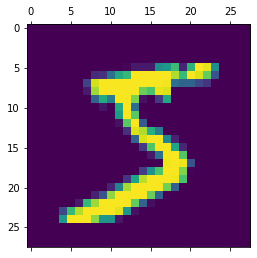

In [11]:
plt.matshow(x_train[0])

In [14]:
y_train[2]

4

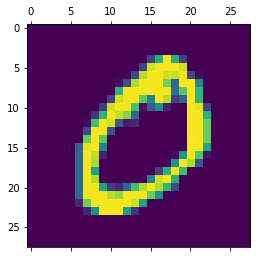

In [12]:
plt.matshow(x_train[1])

In [13]:
y_train[2]

4

In [15]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [22]:

x_train = x_train / 255
x_test = x_test / 255

In [23]:

x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [24]:

x_train_flattened.shape

(60000, 784)

In [25]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)# after scaling i got good accuracy in training the model

Epoch 1/5
1875/1875 [==============================] - 2s 783us/step - loss: 0.7182 - accuracy: 0.8149
Epoch 2/5
1875/1875 [==============================] - 1s 744us/step - loss: 0.3088 - accuracy: 0.9136
Epoch 3/5
1875/1875 [==============================] - 1s 741us/step - loss: 0.2800 - accuracy: 0.9222
Epoch 4/5
1875/1875 [==============================] - 2s 960us/step - loss: 0.2737 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 1s 747us/step - loss: 0.2664 - accuracy: 0.9257


In [27]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 676us/step - loss: 0.2682 - accuracy: 0.9251


[0.2682203948497772, 0.9251000285148621]

In [28]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

array([1.9765884e-02, 3.0701085e-07, 4.6470731e-02, 9.5843196e-01,
       1.8396974e-03, 8.6459070e-02, 1.7281941e-06, 9.9981374e-01,
       7.7427924e-02, 6.2550539e-01], dtype=float32)

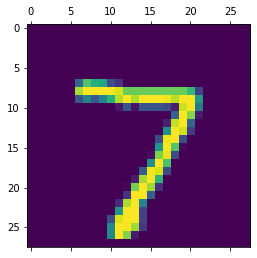

In [29]:
plt.matshow(x_test[0])

In [31]:
y_predicted=model.predict(x_test_flattened)
y_predicted[0]

array([1.9765884e-02, 3.0701085e-07, 4.6470731e-02, 9.5843196e-01,
       1.8396974e-03, 8.6459070e-02, 1.7281941e-06, 9.9981374e-01,
       7.7427924e-02, 6.2550539e-01], dtype=float32)

In [32]:
np.argmax(y_predicted[0])#numpy will take out the max scoreamong the above value by using function argmax

7

In [33]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [34]:

y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [35]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [36]:
#above we can see that the model is predicting correctly as it is y_test and y_predicted values are same
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    4,    8,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   7,    9,  921,   19,   10,    3,   13,   11,   36,    3],
       [   2,    0,   16,  932,    1,   17,    4,   12,   17,    9],
       [   1,    2,    2,    1,  913,    0,   12,    5,    6,   40],
       [  10,    2,    1,   42,   11,  760,   20,    9,   30,    7],
       [   9,    3,    3,    2,    7,    9,  922,    2,    1,    0],
       [   1,    5,   20,    6,    6,    1,    0,  962,    3,   24],
       [   9,   10,    6,   27,   10,   26,   10,   13,  848,   15],
       [  11,    7,    1,    9,   25,    6,    0,   31,    4,  915]])>

Text(69.0, 0.5, 'Truth')

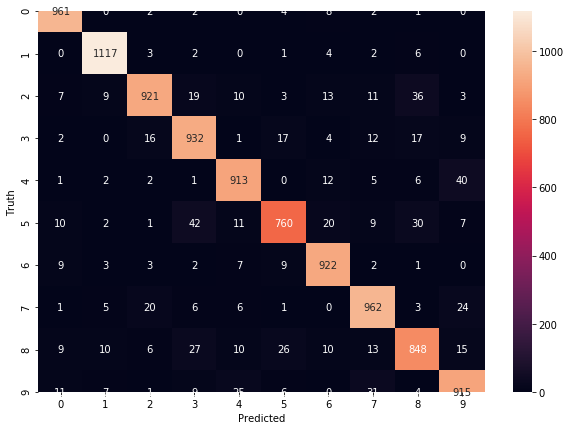

In [37]:

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# using hidden layers

In [40]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4477 - accuracy: 0.8749
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1340 - accuracy: 0.9604
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0922 - accuracy: 0.9724
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0660 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0501 - accuracy: 0.9853


In [41]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0874 - accuracy: 0.9748


[0.08739322423934937, 0.9747999906539917]

Text(69.0, 0.5, 'Truth')

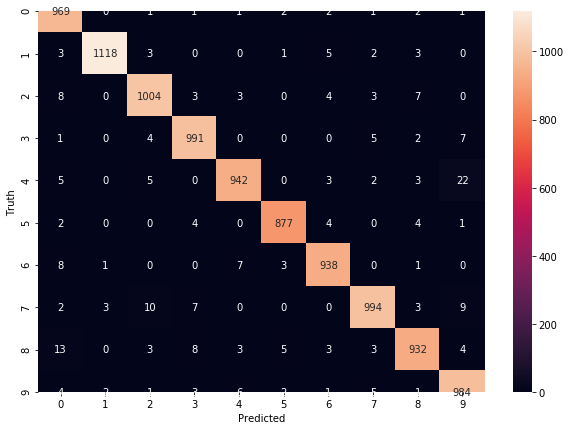

In [42]:

y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Flatten layer so that we don't have to call .reshape on input dataset

In [44]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4498 - accuracy: 0.8735
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1291 - accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0845 - accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0624 - accuracy: 0.9816
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0467 - accuracy: 0.9852
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0388 - accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0319 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0258 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0210 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.016

In [45]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0902 - accuracy: 0.9754


[0.09015388041734695, 0.9753999710083008]

In [ ]:
#accuracy is kind of similar 